# Clustering Analysis (K-Means)

## Approach:
- Apply K-Means with K=8 clusters (matching the 8 arrhythmia classes)
- Visualize clusters using PCA dimensionality reduction
- Analyze how well clusters align with actual arrhythmia classes
- Create new features based on distance to cluster centers
- Train classifiers using cluster features and compare with original models

***

In [17]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns

np.random.seed(42)

print("Clustering libraries imported successfully.")

Clustering libraries imported successfully.


***

### Loading Data

In [6]:
# Load beat holdout training data
print("Loading beat holdout training data.")
train_beats = pd.read_csv('train_beats.csv')
print(f"Data shape: {train_beats.shape}")

# Separate features and labels
X_train_beats = train_beats.iloc[:, :-2].values  
y_train_beats = train_beats.iloc[:, -2].values

print(f"Features shape: {X_train_beats.shape}")
print(f"Labels shape: {y_train_beats.shape}")
print(f"Unique classes: {np.unique(y_train_beats)}")

Loading beat holdout training data.
Data shape: (30991, 277)
Features shape: (30991, 275)
Labels shape: (30991,)
Unique classes: [1. 2. 3. 4. 5. 6. 7. 8.]


In [7]:
# Load patient holdout training data
print("Loading patient holdout training data.")
train_patients = pd.read_csv('train_patients.csv')
print(f"Data shape: {train_patients.shape}")

# Separate features and labels
X_train_patients = train_patients.iloc[:, :-2].values  
y_train_patients = train_patients.iloc[:, -2].values

print(f"Features shape: {X_train_patients.shape}")
print(f"Labels shape: {y_train_patients.shape}")
print(f"Unique classes: {np.unique(y_train_patients)}")

Loading patient holdout training data.
Data shape: (200351, 277)
Features shape: (200351, 275)
Labels shape: (200351,)
Unique classes: [1. 2. 3. 4. 5. 6. 7. 8.]


***

### Apply K-Means Clustering

In [10]:
print("=" * 70)
print("APPLYING K-MEANS CLUSTERING (K=8)")
print("=" * 70)

# K-Means on BEAT HOLDOUT
print("\n1. Beat Holdout Data:")
print("-" * 70)
kmeans_beats = KMeans(n_clusters=8, random_state=42, n_init=10)
cluster_labels_beats = kmeans_beats.fit_predict(X_train_beats)

print(f"Clustering complete.")
print(f"Data shape: {X_train_beats.shape}")
print(f"Cluster centers shape: {kmeans_beats.cluster_centers_.shape}")
print("\nCluster distribution:")
unique, counts = np.unique(cluster_labels_beats, return_counts=True)
for cluster_id, count in zip(unique, counts):
    pct = (count / len(cluster_labels_beats)) * 100
    print(f"  Cluster {cluster_id}: {count:5d} samples ({pct:5.2f}%)")

# K-Means on PATIENT HOLDOUT
print("\n2. Patient Holdout Data:")
print("-" * 70)
kmeans_patients = KMeans(n_clusters=8, random_state=42, n_init=10)
cluster_labels_patients = kmeans_patients.fit_predict(X_train_patients)

print(f"Clustering complete.")
print(f"Data shape: {X_train_patients.shape}")
print(f"Cluster centers shape: {kmeans_patients.cluster_centers_.shape}")
print("\nCluster distribution:")
unique, counts = np.unique(cluster_labels_patients, return_counts=True)
for cluster_id, count in zip(unique, counts):
    pct = (count / len(cluster_labels_patients)) * 100
    print(f"  Cluster {cluster_id}: {count:5d} samples ({pct:5.2f}%)")

print("\n" + "=" * 70)
print("K-Means clustering complete for both datasets.")
print("=" * 70)

APPLYING K-MEANS CLUSTERING (K=8)

1. Beat Holdout Data:
----------------------------------------------------------------------
Clustering complete.
Data shape: (30991, 275)
Cluster centers shape: (8, 275)

Cluster distribution:
  Cluster 0:  2813 samples ( 9.08%)
  Cluster 1:  8687 samples (28.03%)
  Cluster 2:  2546 samples ( 8.22%)
  Cluster 3:  4719 samples (15.23%)
  Cluster 4:  1864 samples ( 6.01%)
  Cluster 5:  4222 samples (13.62%)
  Cluster 6:  3015 samples ( 9.73%)
  Cluster 7:  3125 samples (10.08%)

2. Patient Holdout Data:
----------------------------------------------------------------------
Clustering complete.
Data shape: (200351, 275)
Cluster centers shape: (8, 275)

Cluster distribution:
  Cluster 0: 55850 samples (27.88%)
  Cluster 1: 27460 samples (13.71%)
  Cluster 2: 11670 samples ( 5.82%)
  Cluster 3: 30851 samples (15.40%)
  Cluster 4: 19095 samples ( 9.53%)
  Cluster 5: 20509 samples (10.24%)
  Cluster 6: 17261 samples ( 8.62%)
  Cluster 7: 17655 samples ( 8.8

### Cluster-Class Alignment Analysis


Beat Holdout - Cluster-Class Alignment:

Dominant cluster per class:
  Class 1 (N): Cluster 5 (1130/3874 = 29.2%)
  Class 2 (L): Cluster 1 (2602/3874 = 67.2%)
  Class 3 (R): Cluster 3 (1237/3874 = 31.9%)
  Class 4 (V): Cluster 1 (1291/3874 = 33.3%)
  Class 5 (A): Cluster 3 (1790/3874 = 46.2%)
  Class 6 (F): Cluster 1 (1990/3874 = 51.4%)
  Class 7 (f): Cluster 1 (1443/3873 = 37.3%)
  Class 8 (/): Cluster 0 (2447/3874 = 63.2%)


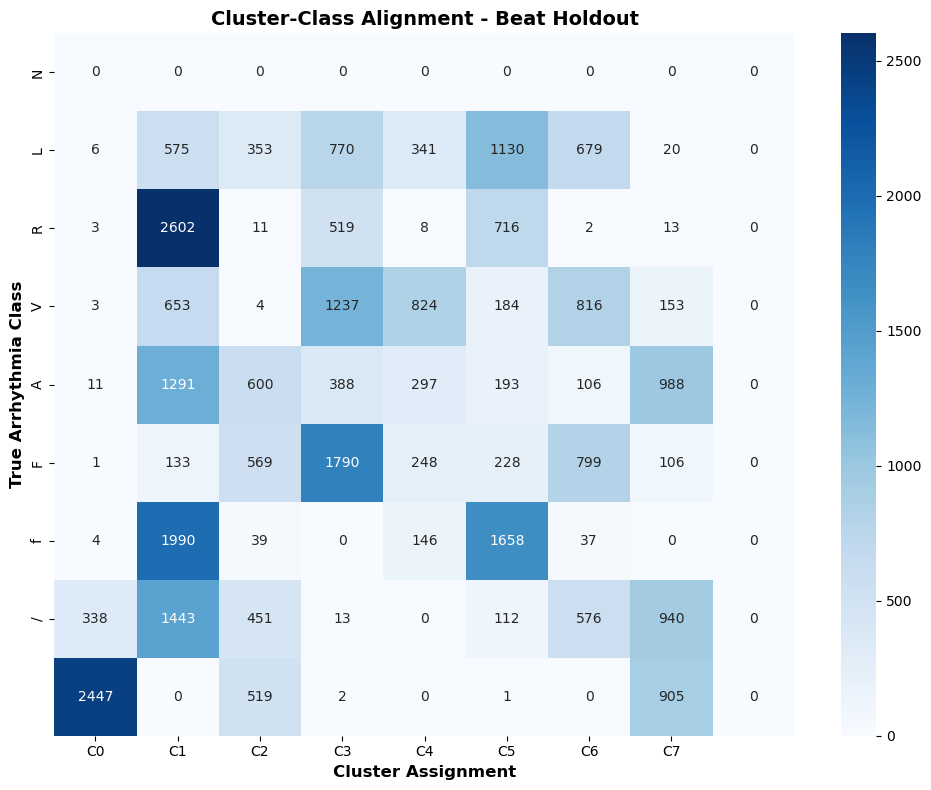


Overall cluster purity: 44.9%
(Percentage of samples in their dominant cluster)

Patient Holdout - Cluster-Class Alignment:

Dominant cluster per class:
  Class 1 (N): Cluster 1 (7136/25044 = 28.5%)
  Class 2 (L): Cluster 0 (17005/25044 = 67.9%)
  Class 3 (R): Cluster 3 (8215/25044 = 32.8%)
  Class 4 (V): Cluster 0 (8771/25044 = 35.0%)
  Class 5 (A): Cluster 3 (11752/25044 = 46.9%)
  Class 6 (F): Cluster 0 (12439/25044 = 49.7%)
  Class 7 (f): Cluster 0 (8990/25043 = 35.9%)
  Class 8 (/): Cluster 7 (15394/25044 = 61.5%)


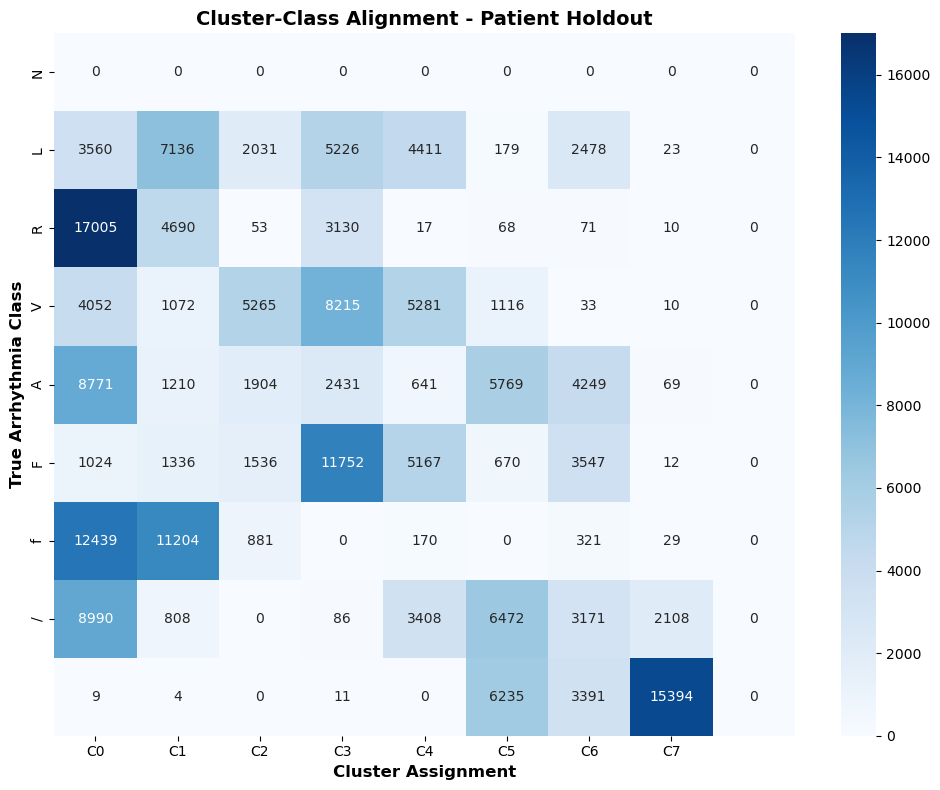


Overall cluster purity: 44.8%
(Percentage of samples in their dominant cluster)


In [12]:
# Function to analyze cluster-class alignment
def analyze_cluster_class_alignment(cluster_labels, true_labels, dataset_name):

    print(f"\n{dataset_name} - Cluster-Class Alignment:")
    print("=" * 70)
    
    # Create confusion matrix: rows=true classes, columns=clusters
    cm = confusion_matrix(true_labels, cluster_labels)
    
    # Calculate cluster purity for each class
    print("\nDominant cluster per class:")
    for class_id in range(1, 9):
        class_mask = (true_labels == class_id)
        class_clusters = cluster_labels[class_mask]
        
        if len(class_clusters) > 0:
            dominant_cluster = np.bincount(class_clusters).argmax()
            dominant_count = np.sum(class_clusters == dominant_cluster)
            purity = (dominant_count / len(class_clusters)) * 100
            
            class_names = {1:'N', 2:'L', 3:'R', 4:'V', 5:'A', 6:'F', 7:'f', 8:'/'}
            print(f"  Class {class_id} ({class_names[class_id]}): Cluster {dominant_cluster} "
                  f"({dominant_count}/{len(class_clusters)} = {purity:.1f}%)")
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=[f'C{i}' for i in range(8)],
                yticklabels=['N', 'L', 'R', 'V', 'A', 'F', 'f', '/'])
    plt.xlabel('Cluster Assignment', fontsize=12, fontweight='bold')
    plt.ylabel('True Arrhythmia Class', fontsize=12, fontweight='bold')
    plt.title(f'Cluster-Class Alignment - {dataset_name}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Calculate overall purity
    max_per_class = cm.max(axis=1)
    overall_purity = max_per_class.sum() / cm.sum()
    print(f"\nOverall cluster purity: {overall_purity:.1%}")
    print("(Percentage of samples in their dominant cluster)")
    print("=" * 70)

# Analyze both datasets
analyze_cluster_class_alignment(cluster_labels_beats, y_train_beats, "Beat Holdout")
analyze_cluster_class_alignment(cluster_labels_patients, y_train_patients, "Patient Holdout")

***

### Create Cluster-Based Features

Since clusters don't perfectly align with classes (44.9% purity), we create new features based on distances to cluster centers. This gives us 8 features (distance to each of 8 cluster centers) instead of 275 raw features.

**Hypothesis**: These cluster features might capture high-level patterns that help classification.

In [15]:
print("=" * 70)
print("CREATING CLUSTER-BASED FEATURES")
print("=" * 70)

# Create cluster features for BEAT HOLDOUT
print("\n1. Beat Holdout:")
print("-" * 70)

# Distance to each cluster center (training data)
cluster_features_beats_train = euclidean_distances(X_train_beats, kmeans_beats.cluster_centers_)
print(f"Training cluster features shape: {cluster_features_beats_train.shape}")
print(f"  (30,991 samples × 8 cluster distances)")

# Also need to transform test data
test_beats = pd.read_csv('test_beats.csv')
X_test_beats = test_beats.iloc[:, :-2].values
y_test_beats = test_beats.iloc[:, -2].values

cluster_features_beats_test = euclidean_distances(X_test_beats, kmeans_beats.cluster_centers_)
print(f"Test cluster features shape: {cluster_features_beats_test.shape}")
print(f"  ({len(X_test_beats):,} samples × 8 cluster distances)")

# Create cluster features for PATIENT HOLDOUT
print("\n2. Patient Holdout:")
print("-" * 70)

# Distance to each cluster center (training data)
cluster_features_patients_train = euclidean_distances(X_train_patients, kmeans_patients.cluster_centers_)
print(f"Training cluster features shape: {cluster_features_patients_train.shape}")
print(f"  ({len(X_train_patients):,} samples × 8 cluster distances)")

# Transform test data
test_patients = pd.read_csv('test_patients.csv')
X_test_patients = test_patients.iloc[:, :-2].values
y_test_patients = test_patients.iloc[:, -2].values

cluster_features_patients_test = euclidean_distances(X_test_patients, kmeans_patients.cluster_centers_)
print(f"Test cluster features shape: {cluster_features_patients_test.shape}")
print(f"  ({len(X_test_patients):,} samples × 8 cluster distances)")

print("\n" + "=" * 70)
print("Cluster features created for all datasets.")
print("=" * 70)

CREATING CLUSTER-BASED FEATURES

1. Beat Holdout:
----------------------------------------------------------------------
Training cluster features shape: (30991, 8)
  (30,991 samples × 8 cluster distances)
Test cluster features shape: (37441, 8)
  (37,441 samples × 8 cluster distances)

2. Patient Holdout:
----------------------------------------------------------------------
Training cluster features shape: (200351, 8)
  (200,351 samples × 8 cluster distances)
Test cluster features shape: (14481, 8)
  (14,481 samples × 8 cluster distances)

Cluster features created for all datasets.


***

### Classification Using Cluster Features

Now we train SVM and Random Forest classifiers using only the 8 cluster-based features (instead of 275 raw features) and compare performance with the original models.

In [18]:
print("=" * 70)
print("CLASSIFICATION WITH CLUSTER FEATURES")
print("=" * 70)

# Store results for comparison
cluster_results = {}

# --- BEAT HOLDOUT - SVM ---
print("\n1. SVM - Beat Holdout (Cluster Features):")
print("-" * 70)

svm_cluster_beats = SVC(kernel='rbf', random_state=42)
svm_cluster_beats.fit(cluster_features_beats_train, y_train_beats)
y_pred_svm_cluster_beats = svm_cluster_beats.predict(cluster_features_beats_test)

acc = accuracy_score(y_test_beats, y_pred_svm_cluster_beats)
cluster_results['SVM Beats (Cluster)'] = acc
print(f"Accuracy: {acc:.4f}")
print(f"Original SVM Beats accuracy: 0.9384")
print(f"Difference: {acc - 0.9384:+.4f}")

# --- BEAT HOLDOUT - RF ---
print("\n2. Random Forest - Beat Holdout (Cluster Features):")
print("-" * 70)

rf_cluster_beats = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_cluster_beats.fit(cluster_features_beats_train, y_train_beats)
y_pred_rf_cluster_beats = rf_cluster_beats.predict(cluster_features_beats_test)

acc = accuracy_score(y_test_beats, y_pred_rf_cluster_beats)
cluster_results['RF Beats (Cluster)'] = acc
print(f"Accuracy: {acc:.4f}")
print(f"Original RF Beats accuracy: 0.9667")
print(f"Difference: {acc - 0.9667:+.4f}")

# --- PATIENT HOLDOUT - SVM (Using LinearSVC for speed) ---
print("\n3. LinearSVC - Patient Holdout (Cluster Features):")
print("-" * 70)
print("Using LinearSVC instead of RBF SVM for computational efficiency...")

svm_cluster_patients = LinearSVC(random_state=42, max_iter=1000, dual=False)
svm_cluster_patients.fit(cluster_features_patients_train, y_train_patients)
y_pred_svm_cluster_patients = svm_cluster_patients.predict(cluster_features_patients_test)

acc = accuracy_score(y_test_patients, y_pred_svm_cluster_patients)
cluster_results['LinearSVC Patients (Cluster)'] = acc
print(f"Accuracy: {acc:.4f}")
print(f"Original SVM Patients accuracy: 0.9633")
print(f"Difference: {acc - 0.9633:+.4f}")

# --- PATIENT HOLDOUT - RF ---
print("\n4. Random Forest - Patient Holdout (Cluster Features):")
print("-" * 70)

rf_cluster_patients = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_cluster_patients.fit(cluster_features_patients_train, y_train_patients)
y_pred_rf_cluster_patients = rf_cluster_patients.predict(cluster_features_patients_test)

acc = accuracy_score(y_test_patients, y_pred_rf_cluster_patients)
cluster_results['RF Patients (Cluster)'] = acc
print(f"Accuracy: {acc:.4f}")
print(f"Original RF Patients accuracy: 0.9987")
print(f"Difference: {acc - 0.9987:+.4f}")

print("\n" + "=" * 70)
print("All cluster-based classifications complete.")
print("=" * 70)

CLASSIFICATION WITH CLUSTER FEATURES

1. SVM - Beat Holdout (Cluster Features):
----------------------------------------------------------------------
Accuracy: 0.7724
Original SVM Beats accuracy: 0.9384
Difference: -0.1660

2. Random Forest - Beat Holdout (Cluster Features):
----------------------------------------------------------------------
Accuracy: 0.9081
Original RF Beats accuracy: 0.9667
Difference: -0.0586

3. LinearSVC - Patient Holdout (Cluster Features):
----------------------------------------------------------------------
Using LinearSVC instead of RBF SVM for computational efficiency...
Accuracy: 0.4817
Original SVM Patients accuracy: 0.9633
Difference: -0.4816

4. Random Forest - Patient Holdout (Cluster Features):
----------------------------------------------------------------------
Accuracy: 0.9917
Original RF Patients accuracy: 0.9987
Difference: -0.0070

All cluster-based classifications complete.


***

### Comparison and Discussion

PERFORMANCE COMPARISON: RAW FEATURES vs CLUSTER FEATURES
      Model  Raw Features (275)  Cluster Features (8)  Difference
   SVM Beat              0.9384                0.7724     -0.1660
    RF Beat              0.9667                0.9081     -0.0586
SVM Patient              0.9633                0.4817     -0.4816
 RF Patient              0.9987                0.9917     -0.0070


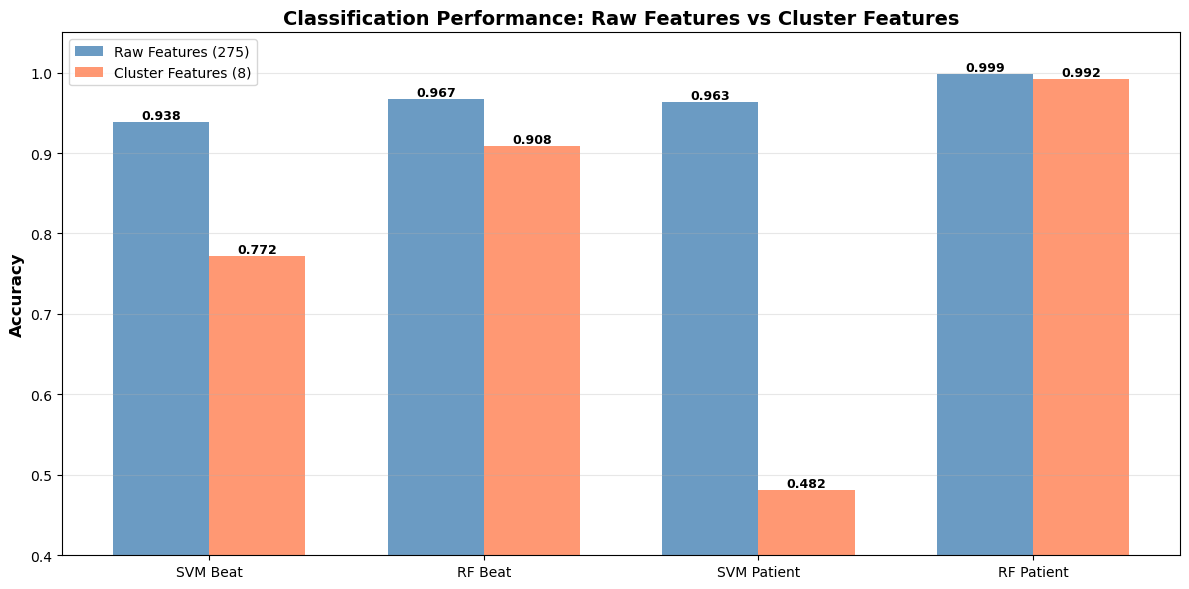

In [19]:
# Create comparison table
comparison_clustering = pd.DataFrame({
    'Model': ['SVM Beat', 'RF Beat', 'SVM Patient', 'RF Patient'],
    'Raw Features (275)': [0.9384, 0.9667, 0.9633, 0.9987],
    'Cluster Features (8)': [0.7724, 0.9081, 0.4817, 0.9917],
    'Difference': [-0.1660, -0.0586, -0.4816, -0.0070]
})

print("=" * 80)
print("PERFORMANCE COMPARISON: RAW FEATURES vs CLUSTER FEATURES")
print("=" * 80)
print(comparison_clustering.to_string(index=False))
print("=" * 80)

# Visualize comparison
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(comparison_clustering))
width = 0.35

bars1 = ax.bar(x - width/2, comparison_clustering['Raw Features (275)'], 
               width, label='Raw Features (275)', color='steelblue', alpha=0.8)
bars2 = ax.bar(x + width/2, comparison_clustering['Cluster Features (8)'], 
               width, label='Cluster Features (8)', color='coral', alpha=0.8)

ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title('Classification Performance: Raw Features vs Cluster Features', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_clustering['Model'])
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0.4, 1.05])

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

### Discussion: Clustering Analysis Findings

#### Key Observations:

**1. Cluster-Class Alignment is Poor (44.9% purity)**
- K-Means clusters do NOT align well with arrhythmia classes
- Most classes are spread across multiple clusters
- Only Class 2 (LBBB) and Class 8 (Paced) show good clustering (67% and 63%)
- This indicates arrhythmia types are NOT naturally separated in the 275-dimensional feature space

**2. Cluster Features Cause Massive Performance Drops**

**Worst case - SVM Patient Holdout:**
- Dropped from 96.33% → 48.17% (-48.2%)
- Only 8 cluster distances cannot capture the complexity needed for arrhythmia classification
- LinearSVC with linear kernel struggles even more with reduced features

**Moderate drops - SVM/RF Beat Holdout:**
- SVM: 93.84% → 77.24% (-16.6%)
- RF: 96.67% → 90.81% (-5.9%)
- Random Forest handles dimensionality reduction better than SVM

**Best case - RF Patient Holdout:**
- Only dropped 99.87% → 99.17% (-0.7%)
- Random Forest's ensemble approach can still learn effectively from cluster features
- Large training set (200k samples) helps compensate for fewer features

**3. Why Cluster Features Fail:**

The poor performance with cluster features tells us:
- **Arrhythmia classification requires fine-grained temporal patterns**
- **8 cluster distances lose critical information** from the original 275 time points
- **QRS morphology (shown important in PFI) cannot be captured by distance to cluster centers**
- Clustering creates a lossy compression that removes discriminative features

**4. Model-Specific Insights:**

- **SVM suffers more** from dimensionality reduction (especially with linear kernel)
- **Random Forest is more robust** to feature reduction due to its ensemble nature
- **Patient holdout shows mixed results**: SVM catastrophically fails (48%), RF barely affected (99%)

#### Conclusions:

- **K-Means clustering does NOT reveal natural arrhythmia groupings**
- **Cluster-based features are INSUFFICIENT for accurate arrhythmia classification**
- **The original 275 temporal features are necessary for capturing ECG morphology**
- **This validates our PFI findings**: specific segments (especially QRS) contain critical discriminative information that gets lost in clustering

**Recommendation**: For ECG arrhythmia classification, use the full temporal features rather than cluster-based dimensionality reduction.

***